# Neural Networks: Linear Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define hyper parameters
INPUT_SIZE = 1
OUTPUT_SIZE = 1
NUM_EPOCHS = 60
LEARNING_RATE = 0.001

In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# Linear regression model
model = nn.Linear(INPUT_SIZE, OUTPUT_SIZE)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

### Training Loop

In [5]:
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(x_train)
targets = torch.from_numpy(y_train)

# Train the model
for epoch in range(NUM_EPOCHS):
    # Forward pass - compute model predictions & calculate loss
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward pass (compute gradients) and optimize (update parameters)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, NUM_EPOCHS, loss.item()))

Epoch [5/60], Loss: 2.3209
Epoch [10/60], Loss: 1.0830
Epoch [15/60], Loss: 0.5814
Epoch [20/60], Loss: 0.3781
Epoch [25/60], Loss: 0.2956
Epoch [30/60], Loss: 0.2621
Epoch [35/60], Loss: 0.2484
Epoch [40/60], Loss: 0.2428
Epoch [45/60], Loss: 0.2404
Epoch [50/60], Loss: 0.2393
Epoch [55/60], Loss: 0.2388
Epoch [60/60], Loss: 0.2384


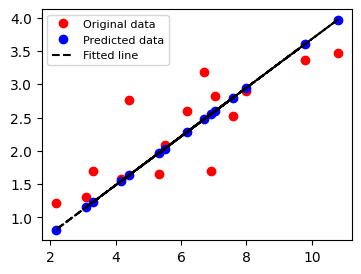

In [17]:
# Create predictions
predicted = model(torch.from_numpy(x_train)).detach().numpy()

# Plot the graph
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x_train, y_train, 'ro', label='Original data')
ax.plot(x_train, predicted, 'bo', label='Predicted data')
ax.plot(x_train, predicted, 'k--', label='Fitted line')
ax.legend(fontsize=8)

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')